## Datasets:-

#### Contraction mapping dataset:-
* https://www.kaggle.com/ishivinal/contractions
    
#### Toxic comments dataset:-
A large number of Wikipedia comments which have been labeled by human raters for toxic behavior
* https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading Toxic Comment Dataset

In [2]:
comments_df = pd.read_csv("C:/Users/asus/Downloads/train.csv/train.csv")

In [3]:
comments_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


### Comments text length variation

In [4]:
comment_lengths = comments_df.comment_text.str.len()

print("Mean comment length:",comment_lengths.mean())

print("STD comment length:",comment_lengths.std())

print("Maximum comment length:",comment_lengths.max())

Mean comment length: 394.0732213246768
STD comment length: 590.7202819048923
Maximum comment length: 5000


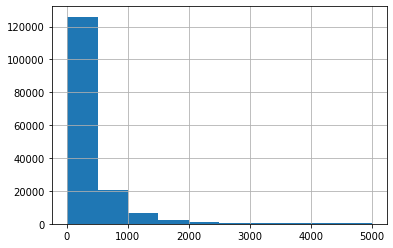

In [5]:
comment_lengths.hist()
plt.show()

**Variation in length is much larger**

## Loading Contraction Mapping Dataset

In [6]:
contraction_mapping = pd.read_csv("C:/Users/asus/Downloads/contractions.csv").set_index('Contraction').T.to_dict("records")[0]

contraction_mapping

{"'aight": 'alright',
 "ain't": 'is not',
 "amn't": 'am not',
 "aren't": 'are not',
 "can't": 'cannot',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "daren't": 'dare not',
 "daresn't": 'dare not',
 "dasn't": 'dare not',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 'dunno': 'do not know',
 "d'ye": 'do you',
 "e'er": 'ever',
 "everybody's": 'everybody is',
 "everyone's": 'everyone is',
 'finna': 'fixing',
 "g'day": 'good day',
 'gimme': 'give me',
 "giv'n": 'given',
 'gonna': 'going to',
 "gon't": 'go not',
 'gotta': 'got to',
 "hadn't": 'had not',
 "had've": 'had have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had',
 "he'll": 'he will',
 "he's": 'he is',
 "he've": 'he have',
 "how'd": 'how did',
 'howdy': 'how do you do',
 "how'll": 'how will',
 "how're": 'how are',
 "how's": 'how is',
 "I'd\tI": 'had',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'm": 'I am',
 "I'm'a": 'I am abo

## Class labels

In [8]:
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [9]:
for cls in classes:
    print(f"{cls}: {len(comments_df[comments_df[cls]==1])/len(comments_df)*100}%")
    print(comments_df[cls].value_counts())
    print("--------------------------------------------")


toxic: 9.584448302009765%
0    144277
1     15294
Name: toxic, dtype: int64
--------------------------------------------
severe_toxic: 0.9995550569965721%
0    157976
1      1595
Name: severe_toxic, dtype: int64
--------------------------------------------
obscene: 5.2948217407925%
0    151122
1      8449
Name: obscene, dtype: int64
--------------------------------------------
threat: 0.2995531769557125%
0    159093
1       478
Name: threat, dtype: int64
--------------------------------------------
insult: 4.936360616904074%
0    151694
1      7877
Name: insult, dtype: int64
--------------------------------------------
identity_hate: 0.8804858025581089%
0    158166
1      1405
Name: identity_hate, dtype: int64
--------------------------------------------


## Checking for missing values

In [10]:
comments_df.isnull().isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

**no missing values**

# Data Preprocessing



### Filtering process

In [11]:

from nltk.stem import WordNetLemmatizer 
import re
  
lemmatizer = WordNetLemmatizer() 
  
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora")) 

rocks : rock
corpora : corpus


In [11]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
def preprocessing(text):
    
    # lower case
    text = text.lower()
    
    temp = ""
    for word in text.split(" "):
        temp += lemmatizer.lemmatize(word) + " "
        
    text = temp
        
    # remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)

    # single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    
    # remove leading and trailing spaces
    text = text.strip()
    
    # multiple spaces
    text = re.sub(' +', ' ', text)

    return text

In [13]:
X = []
for text in tqdm(comments_df.comment_text.tolist()):
    X.append(preprocessing(text))


100%|████████████████████████████████████████████████████████████████████████| 159571/159571 [00:55<00:00, 2886.79it/s]


In [14]:
X

['explanation why the edits made under my username hardcore metallica fan were reverted they weren vandalisms just closure on some gas after voted at new york doll fac and please don remove the template from the talk page since m retired now',
 'd aww he match this background colour m seemingly stuck with thanks talk january utc',
 'hey man m really not trying to edit war it just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info',
 'more can make any real suggestion on improvement wondered if the section statistic should be later on or subsection of types of accidents think the reference may need tidying so that they are all in the exact same format ie date format etc can do that later on if no one else doe first if you have any preference for formatting style on reference or want to do it yourself please let me know there appears to be backlog on article for 

### Tokenization

In [15]:
max_words = 20000 # max size of corpus
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words, oov_token="<UNK>")
tokenizer.fit_on_texts(X)
tokenized_list = tokenizer.texts_to_sequences(X)

In [16]:
tokenizer.word_counts    # word counts

OrderedDict([('explanation', 2004),
             ('why', 17872),
             ('the', 497217),
             ('edits', 9995),
             ('made', 9685),
             ('under', 7013),
             ('my', 45665),
             ('username', 1826),
             ('hardcore', 167),
             ('metallica', 39),
             ('fan', 1437),
             ('were', 15430),
             ('reverted', 3909),
             ('they', 29325),
             ('weren', 435),
             ('vandalisms', 19),
             ('just', 27829),
             ('closure', 95),
             ('on', 90049),
             ('some', 22606),
             ('gas', 355),
             ('after', 8501),
             ('voted', 302),
             ('at', 39581),
             ('new', 10715),
             ('york', 931),
             ('doll', 31),
             ('fac', 327),
             ('and', 224302),
             ('please', 29802),
             ('don', 23543),
             ('remove', 5275),
             ('template', 4313),
          

In [17]:
tokenizer.word_index  # index of each word or token given to word

{'<UNK>': 1,
 'the': 2,
 'to': 3,
 'of': 4,
 'and': 5,
 'you': 6,
 'is': 7,
 'that': 8,
 'it': 9,
 'in': 10,
 'for': 11,
 'this': 12,
 'not': 13,
 'on': 14,
 'be': 15,
 'have': 16,
 'are': 17,
 'article': 18,
 'your': 19,
 'with': 20,
 'if': 21,
 'wa': 22,
 'or': 23,
 'page': 24,
 'but': 25,
 'wikipedia': 26,
 'my': 27,
 'an': 28,
 'from': 29,
 'by': 30,
 'do': 31,
 'at': 32,
 'can': 33,
 'talk': 34,
 'me': 35,
 'about': 36,
 'so': 37,
 'what': 38,
 'there': 39,
 'all': 40,
 'ha': 41,
 'will': 42,
 'one': 43,
 'no': 44,
 'please': 45,
 'they': 46,
 'would': 47,
 'he': 48,
 'like': 49,
 'just': 50,
 'we': 51,
 'which': 52,
 'any': 53,
 'been': 54,
 'should': 55,
 'don': 56,
 'more': 57,
 'some': 58,
 'other': 59,
 'here': 60,
 'who': 61,
 'see': 62,
 'think': 63,
 'also': 64,
 'his': 65,
 'know': 66,
 'because': 67,
 'how': 68,
 'people': 69,
 'am': 70,
 'edit': 71,
 'time': 72,
 'why': 73,
 'source': 74,
 'up': 75,
 'only': 76,
 'user': 77,
 'm': 78,
 'out': 79,
 'use': 80,
 'when': 81

In [18]:
labels = comments_df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]
labels.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


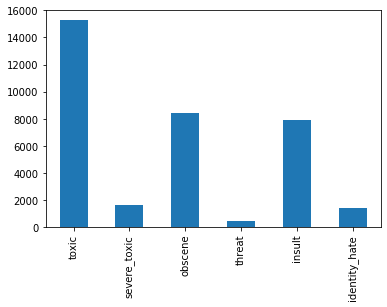

In [19]:
fig_size = plt.rcParams["figure.figsize"]
labels.sum(axis=0).plot.bar()
plt.show()

### Padding Sequence

In [20]:
X_padded = tf.keras.preprocessing.sequence.pad_sequences(tokenized_list, maxlen=400,padding="post")

### Train, test split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, labels, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)

(127656, 400)
(31915, 400)



## Deep Learning

### Model Creation

In [21]:
embed_size = 128

In [24]:
inp = tf.keras.Input(shape=(400,))

x = tf.keras.layers.Embedding(max_words, embed_size)(inp)
x = tf.keras.layers.LSTM(60, return_sequences=True, name="lstm_layer")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(50, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(6, activation="sigmoid")(x)

model = tf.keras.Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 400)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 400, 128)          2560000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 400, 60)           45360     
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)               

### Model Training

In [26]:
batch_size = 32
epochs = 2
model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2


 178/3591 [>.............................] - ETA: 0s - loss: 0.7041 - accuracy: 0.21 - ETA: 6:07 - loss: 0.7005 - accuracy: 0.23 - ETA: 8:25 - loss: 0.6971 - accuracy: 0.29 - ETA: 10:34 - loss: 0.6943 - accuracy: 0.343 - ETA: 10:56 - loss: 0.6916 - accuracy: 0.393 - ETA: 11:12 - loss: 0.6892 - accuracy: 0.432 - ETA: 12:12 - loss: 0.6868 - accuracy: 0.468 - ETA: 13:15 - loss: 0.6844 - accuracy: 0.496 - ETA: 13:31 - loss: 0.6818 - accuracy: 0.527 - ETA: 13:18 - loss: 0.6790 - accuracy: 0.546 - ETA: 13:39 - loss: 0.6763 - accuracy: 0.565 - ETA: 13:34 - loss: 0.6730 - accuracy: 0.585 - ETA: 13:50 - loss: 0.6699 - accuracy: 0.605 - ETA: 13:43 - loss: 0.6666 - accuracy: 0.618 - ETA: 13:36 - loss: 0.6635 - accuracy: 0.633 - ETA: 13:35 - loss: 0.6592 - accuracy: 0.642 - ETA: 13:30 - loss: 0.6542 - accuracy: 0.650 - ETA: 13:27 - loss: 0.6487 - accuracy: 0.661 - ETA: 13:33 - loss: 0.6414 - accuracy: 0.667 - ETA: 13:30 - loss: 0.6339 - accuracy: 0.671 - ETA: 13:26 - loss: 0.6238 - accuracy: 0.677

1271/3591 [=========>....................] - ETA: 8:37 - loss: 0.0944 - accuracy: 0.85 - ETA: 8:36 - loss: 0.0945 - accuracy: 0.85 - ETA: 8:36 - loss: 0.0944 - accuracy: 0.85 - ETA: 8:36 - loss: 0.0945 - accuracy: 0.85 - ETA: 8:36 - loss: 0.0945 - accuracy: 0.85 - ETA: 8:35 - loss: 0.0944 - accuracy: 0.85 - ETA: 8:35 - loss: 0.0944 - accuracy: 0.85 - ETA: 8:35 - loss: 0.0944 - accuracy: 0.85 - ETA: 8:35 - loss: 0.0943 - accuracy: 0.85 - ETA: 8:35 - loss: 0.0943 - accuracy: 0.85 - ETA: 8:34 - loss: 0.0942 - accuracy: 0.85 - ETA: 8:34 - loss: 0.0942 - accuracy: 0.85 - ETA: 8:34 - loss: 0.0942 - accuracy: 0.85 - ETA: 8:34 - loss: 0.0941 - accuracy: 0.85 - ETA: 8:33 - loss: 0.0941 - accuracy: 0.85 - ETA: 8:33 - loss: 0.0940 - accuracy: 0.85 - ETA: 8:33 - loss: 0.0940 - accuracy: 0.85 - ETA: 8:33 - loss: 0.0939 - accuracy: 0.85 - ETA: 8:33 - loss: 0.0938 - accuracy: 0.85 - ETA: 8:32 - loss: 0.0937 - accuracy: 0.85 - ETA: 8:32 - loss: 0.0937 - accuracy: 0.85 - ETA: 8:32 - loss: 0.0938 - accu

1457/3591 [===========>..................] - ETA: 7:57 - loss: 0.0893 - accuracy: 0.87 - ETA: 7:57 - loss: 0.0892 - accuracy: 0.87 - ETA: 7:57 - loss: 0.0892 - accuracy: 0.87 - ETA: 7:57 - loss: 0.0891 - accuracy: 0.87 - ETA: 7:57 - loss: 0.0891 - accuracy: 0.87 - ETA: 7:57 - loss: 0.0891 - accuracy: 0.87 - ETA: 7:56 - loss: 0.0891 - accuracy: 0.87 - ETA: 7:56 - loss: 0.0891 - accuracy: 0.87 - ETA: 7:56 - loss: 0.0890 - accuracy: 0.87 - ETA: 7:56 - loss: 0.0890 - accuracy: 0.87 - ETA: 7:56 - loss: 0.0889 - accuracy: 0.87 - ETA: 7:55 - loss: 0.0889 - accuracy: 0.87 - ETA: 7:55 - loss: 0.0889 - accuracy: 0.87 - ETA: 7:55 - loss: 0.0889 - accuracy: 0.87 - ETA: 7:55 - loss: 0.0888 - accuracy: 0.87 - ETA: 7:54 - loss: 0.0888 - accuracy: 0.87 - ETA: 7:54 - loss: 0.0888 - accuracy: 0.87 - ETA: 7:54 - loss: 0.0888 - accuracy: 0.87 - ETA: 7:54 - loss: 0.0888 - accuracy: 0.87 - ETA: 7:54 - loss: 0.0888 - accuracy: 0.87 - ETA: 7:53 - loss: 0.0888 - accuracy: 0.87 - ETA: 7:53 - loss: 0.0888 - accu

1643/3591 [============>.................] - ETA: 7:19 - loss: 0.0850 - accuracy: 0.88 - ETA: 7:19 - loss: 0.0850 - accuracy: 0.88 - ETA: 7:18 - loss: 0.0850 - accuracy: 0.88 - ETA: 7:18 - loss: 0.0850 - accuracy: 0.88 - ETA: 7:18 - loss: 0.0849 - accuracy: 0.88 - ETA: 7:18 - loss: 0.0849 - accuracy: 0.88 - ETA: 7:18 - loss: 0.0849 - accuracy: 0.88 - ETA: 7:17 - loss: 0.0848 - accuracy: 0.88 - ETA: 7:17 - loss: 0.0848 - accuracy: 0.88 - ETA: 7:17 - loss: 0.0849 - accuracy: 0.88 - ETA: 7:17 - loss: 0.0849 - accuracy: 0.88 - ETA: 7:17 - loss: 0.0848 - accuracy: 0.88 - ETA: 7:16 - loss: 0.0848 - accuracy: 0.88 - ETA: 7:16 - loss: 0.0848 - accuracy: 0.88 - ETA: 7:16 - loss: 0.0848 - accuracy: 0.88 - ETA: 7:16 - loss: 0.0848 - accuracy: 0.88 - ETA: 7:15 - loss: 0.0847 - accuracy: 0.88 - ETA: 7:15 - loss: 0.0847 - accuracy: 0.88 - ETA: 7:15 - loss: 0.0847 - accuracy: 0.88 - ETA: 7:15 - loss: 0.0847 - accuracy: 0.88 - ETA: 7:15 - loss: 0.0846 - accuracy: 0.88 - ETA: 7:14 - loss: 0.0846 - accu

1829/3591 [==============>...............] - ETA: 6:40 - loss: 0.0816 - accuracy: 0.89 - ETA: 6:40 - loss: 0.0816 - accuracy: 0.89 - ETA: 6:39 - loss: 0.0816 - accuracy: 0.89 - ETA: 6:39 - loss: 0.0816 - accuracy: 0.89 - ETA: 6:39 - loss: 0.0816 - accuracy: 0.89 - ETA: 6:39 - loss: 0.0816 - accuracy: 0.89 - ETA: 6:38 - loss: 0.0816 - accuracy: 0.89 - ETA: 6:38 - loss: 0.0815 - accuracy: 0.89 - ETA: 6:38 - loss: 0.0815 - accuracy: 0.89 - ETA: 6:38 - loss: 0.0815 - accuracy: 0.89 - ETA: 6:38 - loss: 0.0815 - accuracy: 0.89 - ETA: 6:37 - loss: 0.0814 - accuracy: 0.89 - ETA: 6:37 - loss: 0.0814 - accuracy: 0.89 - ETA: 6:37 - loss: 0.0814 - accuracy: 0.89 - ETA: 6:37 - loss: 0.0814 - accuracy: 0.89 - ETA: 6:37 - loss: 0.0814 - accuracy: 0.89 - ETA: 6:36 - loss: 0.0814 - accuracy: 0.89 - ETA: 6:36 - loss: 0.0814 - accuracy: 0.89 - ETA: 6:36 - loss: 0.0814 - accuracy: 0.89 - ETA: 6:36 - loss: 0.0814 - accuracy: 0.89 - ETA: 6:35 - loss: 0.0814 - accuracy: 0.89 - ETA: 6:35 - loss: 0.0814 - accu

2015/3591 [===============>..............] - ETA: 6:01 - loss: 0.0791 - accuracy: 0.90 - ETA: 6:01 - loss: 0.0791 - accuracy: 0.90 - ETA: 6:01 - loss: 0.0790 - accuracy: 0.90 - ETA: 6:01 - loss: 0.0790 - accuracy: 0.90 - ETA: 6:00 - loss: 0.0790 - accuracy: 0.90 - ETA: 6:00 - loss: 0.0790 - accuracy: 0.90 - ETA: 6:00 - loss: 0.0790 - accuracy: 0.90 - ETA: 6:00 - loss: 0.0790 - accuracy: 0.90 - ETA: 6:00 - loss: 0.0790 - accuracy: 0.90 - ETA: 5:59 - loss: 0.0789 - accuracy: 0.90 - ETA: 5:59 - loss: 0.0789 - accuracy: 0.90 - ETA: 5:59 - loss: 0.0789 - accuracy: 0.90 - ETA: 5:59 - loss: 0.0789 - accuracy: 0.90 - ETA: 5:59 - loss: 0.0789 - accuracy: 0.90 - ETA: 5:58 - loss: 0.0789 - accuracy: 0.90 - ETA: 5:58 - loss: 0.0789 - accuracy: 0.90 - ETA: 5:58 - loss: 0.0789 - accuracy: 0.90 - ETA: 5:58 - loss: 0.0789 - accuracy: 0.90 - ETA: 5:58 - loss: 0.0789 - accuracy: 0.90 - ETA: 5:57 - loss: 0.0789 - accuracy: 0.90 - ETA: 5:57 - loss: 0.0789 - accuracy: 0.90 - ETA: 5:57 - loss: 0.0789 - accu

2201/3591 [=================>............] - ETA: 5:23 - loss: 0.0769 - accuracy: 0.90 - ETA: 5:23 - loss: 0.0768 - accuracy: 0.90 - ETA: 5:23 - loss: 0.0768 - accuracy: 0.90 - ETA: 5:23 - loss: 0.0768 - accuracy: 0.90 - ETA: 5:22 - loss: 0.0768 - accuracy: 0.90 - ETA: 5:22 - loss: 0.0768 - accuracy: 0.90 - ETA: 5:22 - loss: 0.0768 - accuracy: 0.90 - ETA: 5:22 - loss: 0.0767 - accuracy: 0.90 - ETA: 5:22 - loss: 0.0768 - accuracy: 0.90 - ETA: 5:21 - loss: 0.0768 - accuracy: 0.90 - ETA: 5:21 - loss: 0.0768 - accuracy: 0.90 - ETA: 5:21 - loss: 0.0767 - accuracy: 0.90 - ETA: 5:21 - loss: 0.0767 - accuracy: 0.90 - ETA: 5:21 - loss: 0.0767 - accuracy: 0.90 - ETA: 5:20 - loss: 0.0767 - accuracy: 0.90 - ETA: 5:20 - loss: 0.0768 - accuracy: 0.90 - ETA: 5:20 - loss: 0.0767 - accuracy: 0.90 - ETA: 5:20 - loss: 0.0767 - accuracy: 0.90 - ETA: 5:20 - loss: 0.0767 - accuracy: 0.90 - ETA: 5:19 - loss: 0.0767 - accuracy: 0.90 - ETA: 5:19 - loss: 0.0767 - accuracy: 0.90 - ETA: 5:19 - loss: 0.0767 - accu

2387/3591 [==================>...........] - ETA: 4:45 - loss: 0.0751 - accuracy: 0.91 - ETA: 4:45 - loss: 0.0751 - accuracy: 0.91 - ETA: 4:45 - loss: 0.0751 - accuracy: 0.91 - ETA: 4:44 - loss: 0.0751 - accuracy: 0.91 - ETA: 4:44 - loss: 0.0751 - accuracy: 0.91 - ETA: 4:44 - loss: 0.0750 - accuracy: 0.91 - ETA: 4:44 - loss: 0.0750 - accuracy: 0.91 - ETA: 4:44 - loss: 0.0750 - accuracy: 0.91 - ETA: 4:43 - loss: 0.0750 - accuracy: 0.91 - ETA: 4:43 - loss: 0.0750 - accuracy: 0.91 - ETA: 4:43 - loss: 0.0750 - accuracy: 0.91 - ETA: 4:43 - loss: 0.0749 - accuracy: 0.91 - ETA: 4:43 - loss: 0.0749 - accuracy: 0.91 - ETA: 4:42 - loss: 0.0749 - accuracy: 0.91 - ETA: 4:42 - loss: 0.0749 - accuracy: 0.91 - ETA: 4:42 - loss: 0.0748 - accuracy: 0.91 - ETA: 4:42 - loss: 0.0748 - accuracy: 0.91 - ETA: 4:42 - loss: 0.0748 - accuracy: 0.91 - ETA: 4:41 - loss: 0.0748 - accuracy: 0.91 - ETA: 4:41 - loss: 0.0748 - accuracy: 0.91 - ETA: 4:41 - loss: 0.0748 - accuracy: 0.91 - ETA: 4:41 - loss: 0.0747 - accu

2573/3591 [====================>.........] - ETA: 4:07 - loss: 0.0729 - accuracy: 0.91 - ETA: 4:07 - loss: 0.0729 - accuracy: 0.91 - ETA: 4:06 - loss: 0.0729 - accuracy: 0.91 - ETA: 4:06 - loss: 0.0729 - accuracy: 0.91 - ETA: 4:06 - loss: 0.0729 - accuracy: 0.91 - ETA: 4:06 - loss: 0.0729 - accuracy: 0.91 - ETA: 4:06 - loss: 0.0729 - accuracy: 0.91 - ETA: 4:05 - loss: 0.0729 - accuracy: 0.91 - ETA: 4:05 - loss: 0.0729 - accuracy: 0.91 - ETA: 4:05 - loss: 0.0729 - accuracy: 0.91 - ETA: 4:05 - loss: 0.0729 - accuracy: 0.91 - ETA: 4:04 - loss: 0.0728 - accuracy: 0.91 - ETA: 4:04 - loss: 0.0728 - accuracy: 0.91 - ETA: 4:04 - loss: 0.0728 - accuracy: 0.91 - ETA: 4:04 - loss: 0.0728 - accuracy: 0.91 - ETA: 4:04 - loss: 0.0728 - accuracy: 0.91 - ETA: 4:03 - loss: 0.0728 - accuracy: 0.91 - ETA: 4:03 - loss: 0.0728 - accuracy: 0.91 - ETA: 4:03 - loss: 0.0728 - accuracy: 0.91 - ETA: 4:03 - loss: 0.0728 - accuracy: 0.91 - ETA: 4:03 - loss: 0.0728 - accuracy: 0.91 - ETA: 4:02 - loss: 0.0728 - accu

2759/3591 [======================>.......] - ETA: 3:28 - loss: 0.0714 - accuracy: 0.92 - ETA: 3:28 - loss: 0.0714 - accuracy: 0.92 - ETA: 3:28 - loss: 0.0714 - accuracy: 0.92 - ETA: 3:28 - loss: 0.0714 - accuracy: 0.92 - ETA: 3:28 - loss: 0.0714 - accuracy: 0.92 - ETA: 3:28 - loss: 0.0714 - accuracy: 0.92 - ETA: 3:27 - loss: 0.0714 - accuracy: 0.92 - ETA: 3:27 - loss: 0.0714 - accuracy: 0.92 - ETA: 3:27 - loss: 0.0713 - accuracy: 0.92 - ETA: 3:27 - loss: 0.0713 - accuracy: 0.92 - ETA: 3:27 - loss: 0.0713 - accuracy: 0.92 - ETA: 3:26 - loss: 0.0713 - accuracy: 0.92 - ETA: 3:26 - loss: 0.0713 - accuracy: 0.92 - ETA: 3:26 - loss: 0.0713 - accuracy: 0.92 - ETA: 3:26 - loss: 0.0713 - accuracy: 0.92 - ETA: 3:26 - loss: 0.0713 - accuracy: 0.92 - ETA: 3:25 - loss: 0.0713 - accuracy: 0.92 - ETA: 3:25 - loss: 0.0713 - accuracy: 0.92 - ETA: 3:25 - loss: 0.0713 - accuracy: 0.92 - ETA: 3:25 - loss: 0.0713 - accuracy: 0.92 - ETA: 3:24 - loss: 0.0712 - accuracy: 0.92 - ETA: 3:24 - loss: 0.0712 - accu

2945/3591 [=======================>......] - ETA: 2:50 - loss: 0.0700 - accuracy: 0.92 - ETA: 2:50 - loss: 0.0700 - accuracy: 0.92 - ETA: 2:50 - loss: 0.0700 - accuracy: 0.92 - ETA: 2:50 - loss: 0.0700 - accuracy: 0.92 - ETA: 2:49 - loss: 0.0700 - accuracy: 0.92 - ETA: 2:49 - loss: 0.0700 - accuracy: 0.92 - ETA: 2:49 - loss: 0.0700 - accuracy: 0.92 - ETA: 2:49 - loss: 0.0700 - accuracy: 0.92 - ETA: 2:49 - loss: 0.0700 - accuracy: 0.92 - ETA: 2:48 - loss: 0.0700 - accuracy: 0.92 - ETA: 2:48 - loss: 0.0700 - accuracy: 0.92 - ETA: 2:48 - loss: 0.0700 - accuracy: 0.92 - ETA: 2:48 - loss: 0.0700 - accuracy: 0.92 - ETA: 2:48 - loss: 0.0700 - accuracy: 0.92 - ETA: 2:47 - loss: 0.0699 - accuracy: 0.92 - ETA: 2:47 - loss: 0.0699 - accuracy: 0.92 - ETA: 2:47 - loss: 0.0699 - accuracy: 0.92 - ETA: 2:47 - loss: 0.0699 - accuracy: 0.92 - ETA: 2:47 - loss: 0.0699 - accuracy: 0.92 - ETA: 2:46 - loss: 0.0699 - accuracy: 0.92 - ETA: 2:46 - loss: 0.0700 - accuracy: 0.92 - ETA: 2:46 - loss: 0.0699 - accu

3131/3591 [=========================>....] - ETA: 2:12 - loss: 0.0690 - accuracy: 0.93 - ETA: 2:12 - loss: 0.0690 - accuracy: 0.93 - ETA: 2:12 - loss: 0.0690 - accuracy: 0.93 - ETA: 2:12 - loss: 0.0690 - accuracy: 0.93 - ETA: 2:11 - loss: 0.0690 - accuracy: 0.93 - ETA: 2:11 - loss: 0.0690 - accuracy: 0.93 - ETA: 2:11 - loss: 0.0690 - accuracy: 0.93 - ETA: 2:11 - loss: 0.0690 - accuracy: 0.93 - ETA: 2:11 - loss: 0.0690 - accuracy: 0.93 - ETA: 2:10 - loss: 0.0690 - accuracy: 0.93 - ETA: 2:10 - loss: 0.0690 - accuracy: 0.93 - ETA: 2:10 - loss: 0.0689 - accuracy: 0.93 - ETA: 2:10 - loss: 0.0689 - accuracy: 0.93 - ETA: 2:09 - loss: 0.0689 - accuracy: 0.93 - ETA: 2:09 - loss: 0.0689 - accuracy: 0.93 - ETA: 2:09 - loss: 0.0689 - accuracy: 0.93 - ETA: 2:09 - loss: 0.0689 - accuracy: 0.93 - ETA: 2:09 - loss: 0.0689 - accuracy: 0.93 - ETA: 2:08 - loss: 0.0689 - accuracy: 0.93 - ETA: 2:08 - loss: 0.0688 - accuracy: 0.93 - ETA: 2:08 - loss: 0.0688 - accuracy: 0.93 - ETA: 2:08 - loss: 0.0688 - accu

3317/3591 [==========================>...] - ETA: 1:34 - loss: 0.0679 - accuracy: 0.93 - ETA: 1:34 - loss: 0.0678 - accuracy: 0.93 - ETA: 1:33 - loss: 0.0678 - accuracy: 0.93 - ETA: 1:33 - loss: 0.0678 - accuracy: 0.93 - ETA: 1:33 - loss: 0.0678 - accuracy: 0.93 - ETA: 1:33 - loss: 0.0678 - accuracy: 0.93 - ETA: 1:33 - loss: 0.0678 - accuracy: 0.93 - ETA: 1:32 - loss: 0.0678 - accuracy: 0.93 - ETA: 1:32 - loss: 0.0678 - accuracy: 0.93 - ETA: 1:32 - loss: 0.0678 - accuracy: 0.93 - ETA: 1:32 - loss: 0.0678 - accuracy: 0.93 - ETA: 1:32 - loss: 0.0678 - accuracy: 0.93 - ETA: 1:31 - loss: 0.0678 - accuracy: 0.93 - ETA: 1:31 - loss: 0.0678 - accuracy: 0.93 - ETA: 1:31 - loss: 0.0677 - accuracy: 0.93 - ETA: 1:31 - loss: 0.0677 - accuracy: 0.93 - ETA: 1:31 - loss: 0.0677 - accuracy: 0.93 - ETA: 1:30 - loss: 0.0677 - accuracy: 0.93 - ETA: 1:30 - loss: 0.0677 - accuracy: 0.93 - ETA: 1:30 - loss: 0.0677 - accuracy: 0.93 - ETA: 1:30 - loss: 0.0677 - accuracy: 0.93 - ETA: 1:30 - loss: 0.0677 - accu

3503/3591 [============================>.] - ETA: 56s - loss: 0.0668 - accuracy: 0.937 - ETA: 56s - loss: 0.0668 - accuracy: 0.937 - ETA: 55s - loss: 0.0668 - accuracy: 0.937 - ETA: 55s - loss: 0.0668 - accuracy: 0.937 - ETA: 55s - loss: 0.0668 - accuracy: 0.937 - ETA: 55s - loss: 0.0668 - accuracy: 0.937 - ETA: 54s - loss: 0.0667 - accuracy: 0.937 - ETA: 54s - loss: 0.0667 - accuracy: 0.937 - ETA: 54s - loss: 0.0667 - accuracy: 0.937 - ETA: 54s - loss: 0.0667 - accuracy: 0.937 - ETA: 54s - loss: 0.0667 - accuracy: 0.937 - ETA: 53s - loss: 0.0667 - accuracy: 0.937 - ETA: 53s - loss: 0.0667 - accuracy: 0.937 - ETA: 53s - loss: 0.0667 - accuracy: 0.937 - ETA: 53s - loss: 0.0667 - accuracy: 0.937 - ETA: 53s - loss: 0.0667 - accuracy: 0.937 - ETA: 52s - loss: 0.0667 - accuracy: 0.937 - ETA: 52s - loss: 0.0667 - accuracy: 0.937 - ETA: 52s - loss: 0.0667 - accuracy: 0.937 - ETA: 52s - loss: 0.0667 - accuracy: 0.937 - ETA: 52s - loss: 0.0667 - accuracy: 0.937 - ETA: 51s - loss: 0.0667 - accur

3591/3591 [==============================] - ETA: 17s - loss: 0.0659 - accuracy: 0.940 - ETA: 17s - loss: 0.0659 - accuracy: 0.940 - ETA: 17s - loss: 0.0659 - accuracy: 0.940 - ETA: 17s - loss: 0.0659 - accuracy: 0.940 - ETA: 17s - loss: 0.0658 - accuracy: 0.940 - ETA: 16s - loss: 0.0658 - accuracy: 0.940 - ETA: 16s - loss: 0.0658 - accuracy: 0.940 - ETA: 16s - loss: 0.0658 - accuracy: 0.940 - ETA: 16s - loss: 0.0658 - accuracy: 0.940 - ETA: 16s - loss: 0.0658 - accuracy: 0.940 - ETA: 15s - loss: 0.0658 - accuracy: 0.940 - ETA: 15s - loss: 0.0658 - accuracy: 0.940 - ETA: 15s - loss: 0.0658 - accuracy: 0.940 - ETA: 15s - loss: 0.0658 - accuracy: 0.940 - ETA: 15s - loss: 0.0658 - accuracy: 0.940 - ETA: 14s - loss: 0.0658 - accuracy: 0.940 - ETA: 14s - loss: 0.0658 - accuracy: 0.940 - ETA: 14s - loss: 0.0658 - accuracy: 0.940 - ETA: 14s - loss: 0.0658 - accuracy: 0.940 - ETA: 14s - loss: 0.0658 - accuracy: 0.940 - ETA: 13s - loss: 0.0658 - accuracy: 0.940 - ETA: 13s - loss: 0.0657 - accur

 178/3591 [>.............................] - ETA: 0s - loss: 0.0220 - accuracy: 1.00 - ETA: 5:41 - loss: 0.0393 - accuracy: 1.00 - ETA: 7:41 - loss: 0.0461 - accuracy: 1.00 - ETA: 8:38 - loss: 0.0438 - accuracy: 1.00 - ETA: 9:19 - loss: 0.0435 - accuracy: 1.00 - ETA: 9:38 - loss: 0.0469 - accuracy: 1.00 - ETA: 10:21 - loss: 0.0415 - accuracy: 1.000 - ETA: 10:31 - loss: 0.0426 - accuracy: 1.000 - ETA: 10:36 - loss: 0.0443 - accuracy: 1.000 - ETA: 10:39 - loss: 0.0455 - accuracy: 1.000 - ETA: 10:45 - loss: 0.0454 - accuracy: 1.000 - ETA: 10:51 - loss: 0.0472 - accuracy: 0.994 - ETA: 10:54 - loss: 0.0486 - accuracy: 0.995 - ETA: 10:58 - loss: 0.0482 - accuracy: 0.995 - ETA: 11:03 - loss: 0.0502 - accuracy: 0.993 - ETA: 11:05 - loss: 0.0476 - accuracy: 0.994 - ETA: 11:08 - loss: 0.0478 - accuracy: 0.994 - ETA: 11:11 - loss: 0.0469 - accuracy: 0.994 - ETA: 11:14 - loss: 0.0461 - accuracy: 0.995 - ETA: 11:14 - loss: 0.0492 - accuracy: 0.992 - ETA: 11:15 - loss: 0.0490 - accuracy: 0.992 - ETA

1275/3591 [=========>....................] - ETA: 8:28 - loss: 0.0462 - accuracy: 0.99 - ETA: 8:28 - loss: 0.0462 - accuracy: 0.99 - ETA: 8:28 - loss: 0.0462 - accuracy: 0.99 - ETA: 8:28 - loss: 0.0462 - accuracy: 0.99 - ETA: 8:28 - loss: 0.0462 - accuracy: 0.99 - ETA: 8:28 - loss: 0.0462 - accuracy: 0.99 - ETA: 8:27 - loss: 0.0462 - accuracy: 0.99 - ETA: 8:27 - loss: 0.0462 - accuracy: 0.99 - ETA: 8:27 - loss: 0.0462 - accuracy: 0.99 - ETA: 8:27 - loss: 0.0462 - accuracy: 0.99 - ETA: 8:27 - loss: 0.0462 - accuracy: 0.99 - ETA: 8:26 - loss: 0.0462 - accuracy: 0.99 - ETA: 8:26 - loss: 0.0462 - accuracy: 0.99 - ETA: 8:26 - loss: 0.0463 - accuracy: 0.99 - ETA: 8:26 - loss: 0.0463 - accuracy: 0.99 - ETA: 8:26 - loss: 0.0462 - accuracy: 0.99 - ETA: 8:25 - loss: 0.0462 - accuracy: 0.99 - ETA: 8:25 - loss: 0.0463 - accuracy: 0.99 - ETA: 8:25 - loss: 0.0463 - accuracy: 0.99 - ETA: 8:25 - loss: 0.0463 - accuracy: 0.99 - ETA: 8:25 - loss: 0.0463 - accuracy: 0.99 - ETA: 8:24 - loss: 0.0463 - accu

1461/3591 [===========>..................] - ETA: 7:55 - loss: 0.0466 - accuracy: 0.99 - ETA: 7:55 - loss: 0.0465 - accuracy: 0.99 - ETA: 7:54 - loss: 0.0465 - accuracy: 0.99 - ETA: 7:54 - loss: 0.0465 - accuracy: 0.99 - ETA: 7:54 - loss: 0.0466 - accuracy: 0.99 - ETA: 7:54 - loss: 0.0466 - accuracy: 0.99 - ETA: 7:54 - loss: 0.0466 - accuracy: 0.99 - ETA: 7:53 - loss: 0.0466 - accuracy: 0.99 - ETA: 7:53 - loss: 0.0466 - accuracy: 0.99 - ETA: 7:53 - loss: 0.0466 - accuracy: 0.99 - ETA: 7:53 - loss: 0.0466 - accuracy: 0.99 - ETA: 7:53 - loss: 0.0466 - accuracy: 0.99 - ETA: 7:52 - loss: 0.0466 - accuracy: 0.99 - ETA: 7:52 - loss: 0.0465 - accuracy: 0.99 - ETA: 7:52 - loss: 0.0465 - accuracy: 0.99 - ETA: 7:52 - loss: 0.0465 - accuracy: 0.99 - ETA: 7:52 - loss: 0.0465 - accuracy: 0.99 - ETA: 7:52 - loss: 0.0465 - accuracy: 0.99 - ETA: 7:52 - loss: 0.0465 - accuracy: 0.99 - ETA: 7:51 - loss: 0.0466 - accuracy: 0.99 - ETA: 7:51 - loss: 0.0466 - accuracy: 0.99 - ETA: 7:51 - loss: 0.0466 - accu

1647/3591 [============>.................] - ETA: 7:16 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:16 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:16 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:15 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:15 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:15 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:15 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:14 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:14 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:14 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:14 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:14 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:13 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:13 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:13 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:13 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:13 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:12 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:12 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:12 - loss: 0.0463 - accuracy: 0.99 - ETA: 7:12 - loss: 0.0464 - accuracy: 0.99 - ETA: 7:11 - loss: 0.0464 - accu

1833/3591 [==============>...............] - ETA: 6:38 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:37 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:37 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:37 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:37 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:36 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:36 - loss: 0.0464 - accuracy: 0.99 - ETA: 6:36 - loss: 0.0464 - accuracy: 0.99 - ETA: 6:36 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:35 - loss: 0.0464 - accuracy: 0.99 - ETA: 6:35 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:35 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:35 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:35 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:34 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:34 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:34 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:34 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:33 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:33 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:33 - loss: 0.0465 - accuracy: 0.99 - ETA: 6:33 - loss: 0.0465 - accu

2019/3591 [===============>..............] - ETA: 6:00 - loss: 0.0466 - accuracy: 0.99 - ETA: 6:00 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:59 - loss: 0.0467 - accuracy: 0.99 - ETA: 5:59 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:59 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:59 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:59 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:58 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:58 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:58 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:58 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:58 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:57 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:57 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:57 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:57 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:57 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:56 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:56 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:56 - loss: 0.0465 - accuracy: 0.99 - ETA: 5:56 - loss: 0.0466 - accuracy: 0.99 - ETA: 5:56 - loss: 0.0466 - accu

2205/3591 [=================>............] - ETA: 5:21 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:21 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:20 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:20 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:20 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:20 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:20 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:19 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:18 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:18 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:18 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:18 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:18 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:17 - loss: 0.0463 - accuracy: 0.99 - ETA: 5:17 - loss: 0.0463 - accu

2391/3591 [==================>...........] - ETA: 4:44 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:43 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:43 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:43 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:43 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:43 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:42 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:42 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:42 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:42 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:41 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:41 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:41 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:41 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:41 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:40 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:40 - loss: 0.0463 - accuracy: 0.99 - ETA: 4:40 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:40 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:40 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:39 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:39 - loss: 0.0462 - accu

2577/3591 [====================>.........] - ETA: 4:06 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:06 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:06 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:04 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:04 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:04 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:04 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:04 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:03 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:03 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:03 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:03 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:03 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0462 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0462 - accu

2763/3591 [======================>.......] - ETA: 3:29 - loss: 0.0459 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0459 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0459 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0459 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0459 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0459 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0460 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0460 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0460 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0460 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0460 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0460 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0459 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0459 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0459 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0459 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0459 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0459 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0459 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0459 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0459 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0459 - accu

2949/3591 [=======================>......] - ETA: 2:50 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:50 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:50 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:50 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0458 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0458 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0458 - accu

3135/3591 [=========================>....] - ETA: 2:12 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:12 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:11 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0458 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0458 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0459 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0458 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0458 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0458 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0458 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0458 - accu

3321/3591 [==========================>...] - ETA: 1:34 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:33 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0457 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0457 - accu

3507/3591 [============================>.] - ETA: 55s - loss: 0.0457 - accuracy: 0.991 - ETA: 55s - loss: 0.0457 - accuracy: 0.991 - ETA: 55s - loss: 0.0457 - accuracy: 0.991 - ETA: 55s - loss: 0.0457 - accuracy: 0.991 - ETA: 54s - loss: 0.0457 - accuracy: 0.991 - ETA: 54s - loss: 0.0457 - accuracy: 0.991 - ETA: 54s - loss: 0.0457 - accuracy: 0.991 - ETA: 54s - loss: 0.0457 - accuracy: 0.991 - ETA: 54s - loss: 0.0457 - accuracy: 0.991 - ETA: 53s - loss: 0.0457 - accuracy: 0.991 - ETA: 53s - loss: 0.0457 - accuracy: 0.991 - ETA: 53s - loss: 0.0457 - accuracy: 0.991 - ETA: 53s - loss: 0.0457 - accuracy: 0.991 - ETA: 53s - loss: 0.0457 - accuracy: 0.991 - ETA: 52s - loss: 0.0456 - accuracy: 0.991 - ETA: 52s - loss: 0.0456 - accuracy: 0.991 - ETA: 52s - loss: 0.0456 - accuracy: 0.991 - ETA: 52s - loss: 0.0457 - accuracy: 0.991 - ETA: 52s - loss: 0.0456 - accuracy: 0.991 - ETA: 51s - loss: 0.0456 - accuracy: 0.991 - ETA: 51s - loss: 0.0456 - accuracy: 0.991 - ETA: 51s - loss: 0.0456 - accur

3591/3591 [==============================] - ETA: 17s - loss: 0.0455 - accuracy: 0.991 - ETA: 17s - loss: 0.0455 - accuracy: 0.991 - ETA: 16s - loss: 0.0455 - accuracy: 0.991 - ETA: 16s - loss: 0.0455 - accuracy: 0.991 - ETA: 16s - loss: 0.0455 - accuracy: 0.991 - ETA: 16s - loss: 0.0455 - accuracy: 0.991 - ETA: 16s - loss: 0.0455 - accuracy: 0.991 - ETA: 15s - loss: 0.0455 - accuracy: 0.991 - ETA: 15s - loss: 0.0455 - accuracy: 0.991 - ETA: 15s - loss: 0.0455 - accuracy: 0.991 - ETA: 15s - loss: 0.0455 - accuracy: 0.991 - ETA: 14s - loss: 0.0455 - accuracy: 0.991 - ETA: 14s - loss: 0.0455 - accuracy: 0.991 - ETA: 14s - loss: 0.0455 - accuracy: 0.991 - ETA: 14s - loss: 0.0455 - accuracy: 0.991 - ETA: 14s - loss: 0.0455 - accuracy: 0.991 - ETA: 13s - loss: 0.0455 - accuracy: 0.991 - ETA: 13s - loss: 0.0455 - accuracy: 0.991 - ETA: 13s - loss: 0.0455 - accuracy: 0.991 - ETA: 13s - loss: 0.0455 - accuracy: 0.991 - ETA: 13s - loss: 0.0455 - accuracy: 0.991 - ETA: 12s - loss: 0.0455 - accur

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_test.values[-2]

array([1, 0, 1, 0, 1, 0], dtype=int64)

In [29]:
y_predicted = []

for y_list in tqdm(y_pred):
    temp = []
    for y in y_list:
        if y>=0.2: # probability>=0.2
            temp.append(1)
        else:
            temp.append(0)
    y_predicted.append(temp)

100%|█████████████████████████████████████████████████████████████████████████| 31915/31915 [00:00<00:00, 71610.46it/s]


In [30]:
y_predicted[-2]

[1, 0, 1, 0, 1, 0]

# Model save and load

In [ ]:
#already saved the model

model.save('C:/Users/asus/Downloads/flask_toxic/model_trained.h5')

In [21]:
from keras.models import load_model
newmodel=load_model('C:/Users/asus/Downloads/flask_toxic/model_trained.h5')

In [22]:
newmodel.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 400)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 400, 128)          2560000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 400, 60)           45360     
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)               

In [23]:
newmodel.get_weights()

[array([[ 0.063222  ,  0.03830984, -0.11942302, ...,  0.03430014,
          0.17832665, -0.14208975],
        [-0.04000875, -0.06433206,  0.00027166, ..., -0.03191771,
         -0.03801653, -0.03024408],
        [ 0.03567044,  0.09324288, -0.10835008, ..., -0.07224574,
         -0.06635901, -0.07256303],
        ...,
        [ 0.06165033,  0.01766484, -0.02222137, ..., -0.04542555,
         -0.06884347, -0.02448381],
        [ 0.11776621,  0.07208871, -0.0515195 , ..., -0.05443086,
         -0.14578049, -0.1221239 ],
        [ 0.04411516,  0.03902257, -0.0546845 , ..., -0.01750572,
         -0.02259542, -0.03685926]], dtype=float32),
 array([[-0.02036213, -0.02073302, -0.02929967, ...,  0.0481607 ,
          0.11318264,  0.0314415 ],
        [ 0.00256885, -0.09816831,  0.1924738 , ...,  0.05834541,
          0.0820585 ,  0.1691848 ],
        [ 0.22147115,  0.08880189,  0.10635193, ...,  0.00057995,
         -0.00751436, -0.1437298 ],
        ...,
        [ 0.10828762,  0.14408578, -0.0

In [24]:
newmodel.optimizer

### Test Accuracy

In [54]:
y_predicted = np.array(y_predicted)
y_predicted

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [38]:
y_test 

,toxic,severe_toxic,obscene,threat,insult,identity_hate
119105,0,0,0,0,0,0
131631,0,0,0,0,0,0
125326,0,0,0,0,0,0
111256,0,0,0,0,0,0
83590,0,0,0,0,0,0
...,...,...,...,...,...,...
121162,0,0,0,0,0,0
34019,0,0,0,0,0,0
83938,0,0,0,0,0,0
78687,1,0,1,0,1,0


In [53]:
ytest=y_test.values.tolist()
ytest = np.array(ytest)
ytest

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [55]:
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix

acc = accuracy_score(ytest, y_predicted)
print(acc)

0.8758577471408429


In [56]:
cm = multilabel_confusion_matrix(ytest, y_predicted)

In [57]:
cm

array([[[26963,  1896],
        [  274,  2782]],

       [[31144,   450],
        [   66,   255]],

       [[29480,   720],
        [  142,  1573]],

       [[31839,     2],
        [   74,     0]],

       [[29299,  1002],
        [  182,  1432]],

       [[31325,   296],
        [  178,   116]]], dtype=int64)

# Evaluating model on new input comment

In [26]:
msg='Cocksucker before you piss me before on my task'
msg
msgList = []
msgList.append(preprocessing(msg))

In [27]:
msgList

['cocksucker before you piss me before on my task']

In [28]:

tokenized_list = tokenizer.texts_to_sequences(msgList)
tokenized_list

[[1731, 153, 6, 2929, 35, 153, 14, 27, 1890]]

In [29]:
msg_test = tf.keras.preprocessing.sequence.pad_sequences(tokenized_list, maxlen=400,padding="post")
msg_pred = newmodel.predict(msg_test)
msg_pred

array([[0.99609303, 0.22300836, 0.9479438 , 0.01960355, 0.7929603 ,
        0.09781089]], dtype=float32)

In [30]:
msg_pred[0]

array([0.99609303, 0.22300836, 0.9479438 , 0.01960355, 0.7929603 ,
       0.09781089], dtype=float32)

In [25]:
def msgval(msg_pred):  
    msg_predicted = []   
    temp = []
    for y in msg_pred[0]:
        if y>=0.2: # probability>=0.2
                temp.append(1)
        else:
                temp.append(0)
    msg_predicted.append(temp)
    return msg_predicted

In [32]:
msg_predicted_res=msgval(msg_pred)
msg_predicted_res

[[1, 1, 1, 0, 1, 0]]

In [26]:
#Flag setter
def Result(msg_predicted_res):
    if(msg_predicted_res[0][0]==0):
        t='toxic Comment : No'
    else:
        t='toxic comment : Yes'

    #########################################

    if(msg_predicted_res[0][1]==0):
        st='severe_toxic Comment : No'
    else:
        st='severe_toxic comment : Yes'
    
    #########################################

    if(msg_predicted_res[0][2]==0):
        o='Obscene Comment : No'
    else:
        o='Obscene comment : Yes'
    
    #########################################

    if(msg_predicted_res[0][3]==0):
        th='threat Comment : No'
    else:
        th='threat comment : Yes'
        
    #########################################

    if(msg_predicted_res[0][4]==0):
        i='insult Comment : No'
    else:
        i='insult Comment : Yes'
        
    #########################################

    if(msg_predicted_res[0][5]==0):
        ih='identity_hate Comment : No'
    else:
        ih='identity_hate Comment : Yes'

  
    return t,st,o,th,i,ih

In [35]:
Op=Result(msg_predicted_res)

In [36]:
Op

('toxic comment : Yes',
 'severe_toxic comment : Yes',
 'Obscene comment : Yes',
 'threat Comment : No',
 'insult Comment : Yes',
 'identity_hate Comment : No')

# Flask

In [28]:
from flask import Flask, render_template,request
import numpy as np
app = Flask(__name__)
@app.route('/')
def index():
    return render_template('home.html')

@app.route('/predict' , methods=['POST'])
def home():
    msg = request.form['a']
    msgList = []
    msgList.append(preprocessing(msg))
    tokenized_list = tokenizer.texts_to_sequences(msgList)
    msg_test = tf.keras.preprocessing.sequence.pad_sequences(tokenized_list, maxlen=400,padding="post")
    msg_pred = newmodel.predict(msg_test)
    msg_predicted_res = msgval(msg_pred)
    op = Result(msg_predicted_res)
    
    
    return render_template('predict.html', d1=op[0] , d2=op[1] , d3=op[2] , d4=op[3] , d5=op[4] , d6=op[5])

if __name__ == "__main__":
    from waitress import serve
    serve(app, host="0.0.0.0", port=8081)

Serving on http://LAPTOP-800IT2RJ:8081
